<a href="https://colab.research.google.com/github/Abhilash0201/Abhilash-infosys-Nov24/blob/main/merging_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WEEK-1

DATA COLLECTION


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
product1=pd.read_excel(r'/content/drive/MyDrive/infosys/ProductA.xlsx')
product1.head()

,Day Index,Quantity
0,2021-12-01,14
1,2021-12-02,10
2,2021-12-03,13
3,2021-12-04,22
4,2021-12-05,33


FACEBOOK IMPRESSIONS DATA

In [6]:
facebook_impressions=pd.read_excel(r'/content/drive/MyDrive/infosys/ProductA_fb_impressions.xlsx')
facebook_impressions.head()

,Day Index,Impressions
0,2021-12-01,620
1,2021-12-02,890
2,2021-12-03,851
3,2021-12-04,881
4,2021-12-05,678


GOOGLE CLICKS DATA

In [7]:
google_clicks=pd.read_excel(r'/content/drive/MyDrive/infosys/ProductA_google_clicks.xlsx')
google_clicks.head()

,Day Index,Clicks
0,2021-12-01,445
1,2021-12-02,433
2,2021-12-03,424
3,2021-12-04,427
4,2021-12-05,451


MERGING DATA

In [9]:
mergeddata = pd.merge(product1,facebook_impressions , on="Day Index", how="left")
masterdata = pd.merge(mergeddata,google_clicks, on="Day Index", how="left")
masterdata.head()
print(masterdata)

     Day Index  Quantity  Impressions  Clicks
0   2021-12-01        14          620     445
1   2021-12-02        10          890     433
2   2021-12-03        13          851     424
3   2021-12-04        22          881     427
4   2021-12-05        33          678     451
..         ...       ...          ...     ...
207 2022-06-26        13         1218     114
208 2022-06-27        16         1311     106
209 2022-06-28        13          885     109
210 2022-06-29        16         1000      60
211 2022-06-30         8          875      65

[212 rows x 4 columns]


In [12]:
file_path = '/content/drive/My Drive/infosys/ProductA_masterdata.xlsx'
masterdata.to_excel(file_path, index=False)
print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/infosys/ProductA_masterdata.xlsx


Detecting Missing Values and Cleaning Dataset

In [13]:
import pandas as pd

# Loading the uploaded Excel file

data = pd.read_excel('/content/drive/MyDrive/infosys/ProductA_masterdata.xlsx')

# Finding missing values
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

Day Index      0
Quantity       0
Impressions    0
Clicks         0
dtype: int64


DROPPING DUPLICATES

In [14]:
import pandas as pd

# Load the master data
data = pd.read_excel('/content/drive/MyDrive/infosys/ProductA_masterdata.xlsx')
data = data.drop_duplicates()
print("Number of rows after dropping duplicates:", data.shape[0])

Number of rows after dropping duplicates: 212


CHECKS ON TRENDS

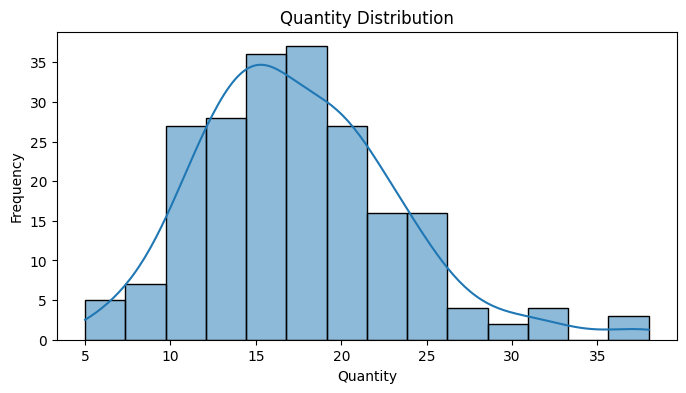

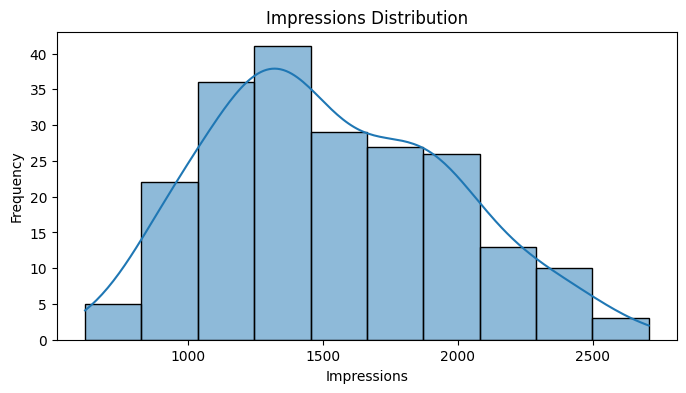

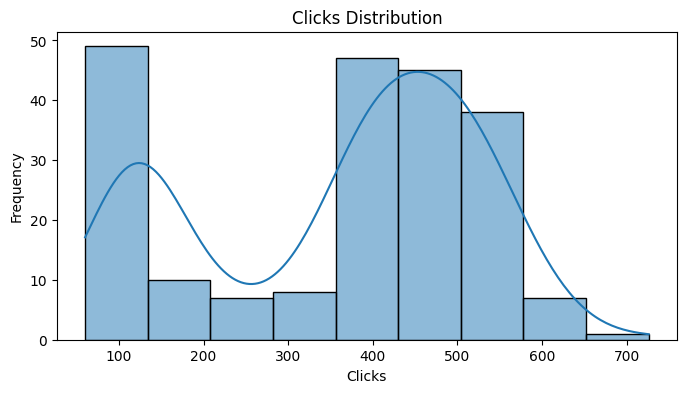

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as br
from sklearn.preprocessing import MinMaxScaler

# Loading the dataset
file_path = '/content/drive/MyDrive/infosys/ProductA_masterdata.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

## Distribution Plots with Insights
for col in ['Quantity', 'Impressions', 'Clicks']:
    plt.figure(figsize=(8, 4))
    br.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

BOX PLOTS

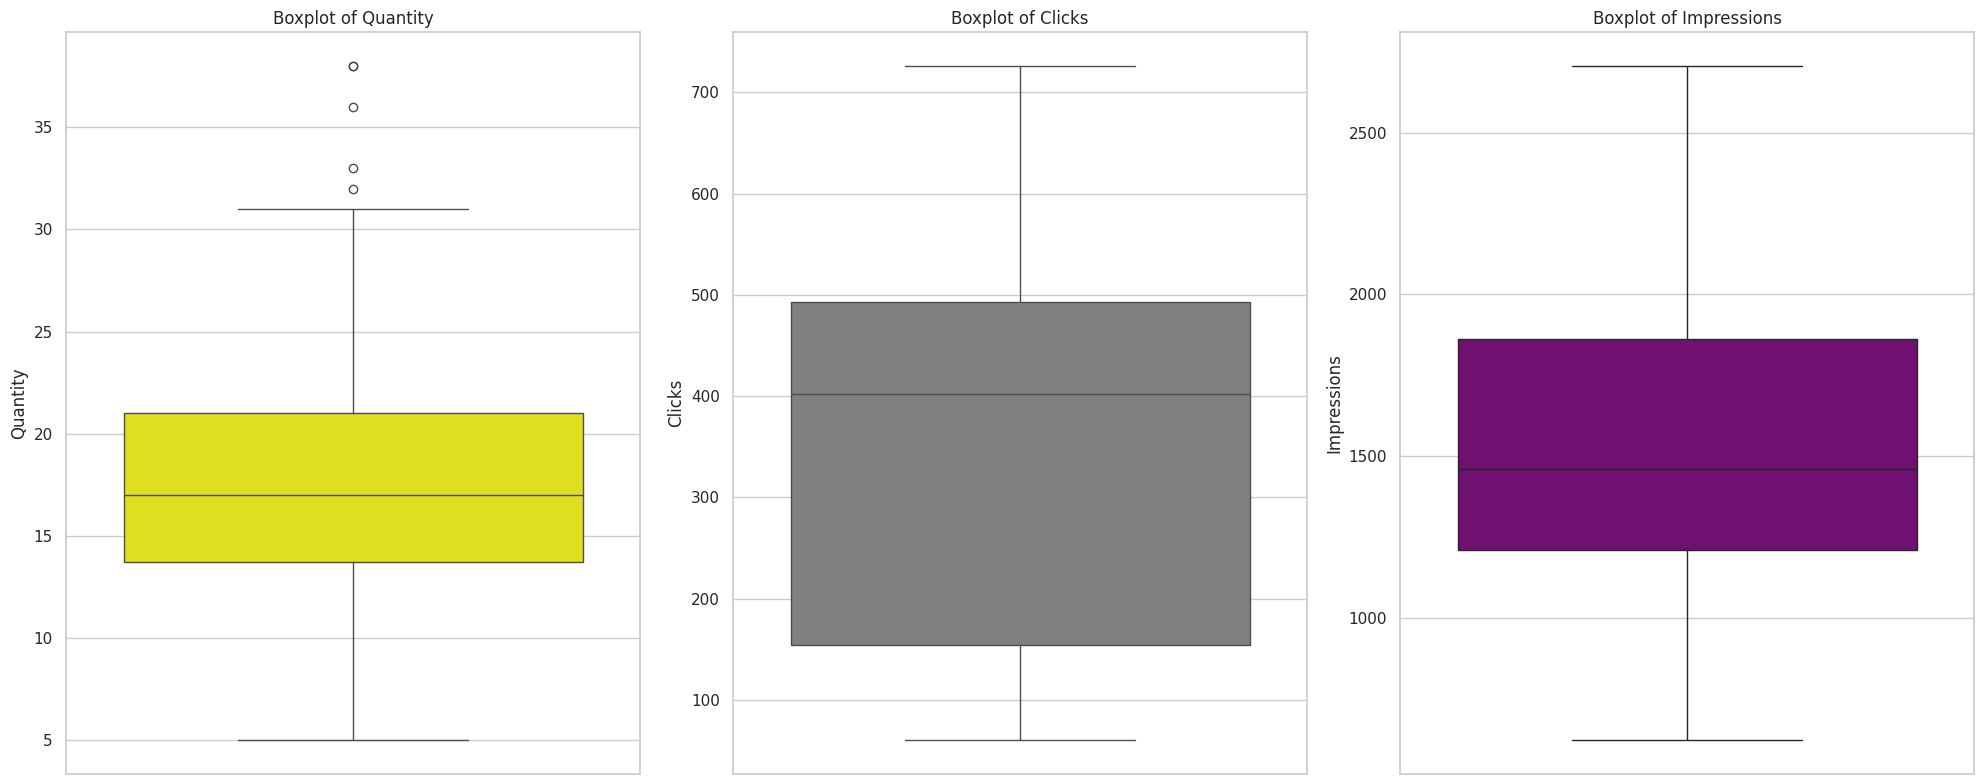

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/infosys/ProductA_masterdata.xlsx'
df = pd.read_excel(file_path)

# Set style for plots
sns.set(style="whitegrid")

# Create boxplots for 'Quantity', 'Clicks', and 'Impressions' columns
plt.figure(figsize=(20, 8))

# Boxplot for 'Quantity'
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Quantity'], color='yellow')
plt.title('Boxplot of Quantity')

# Boxplot for 'Impressions'
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Impressions'], color='purple')
plt.title('Boxplot of Impressions')

# Boxplot for 'Clicks'
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Clicks'], color='grey')
plt.title('Boxplot of Clicks')

plt.tight_layout()
plt.show()

SALES QUANTITY THROUGH TIME

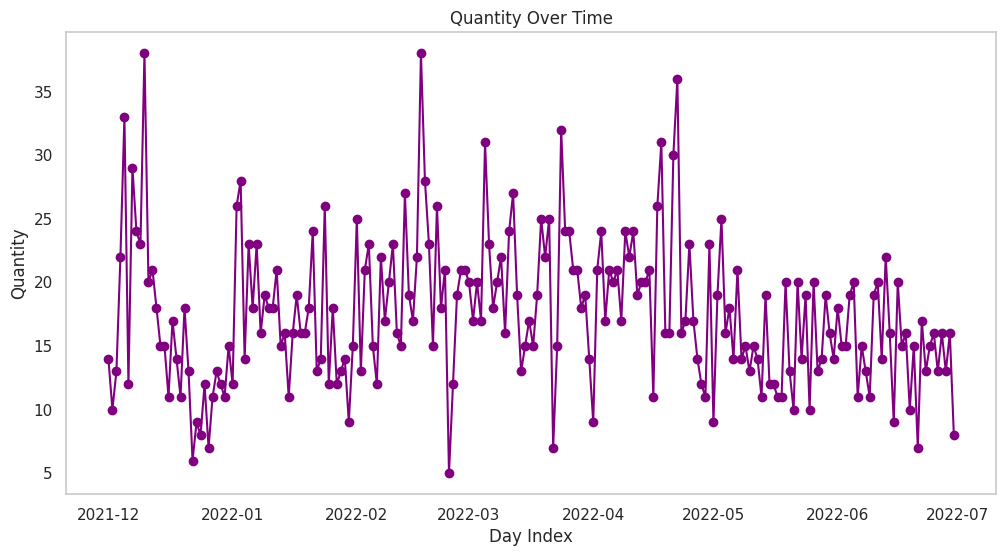

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/infosys/ProductA_mergedata.xlsx'
#df = pd.read_excel(file_path)

# Plot Quantity over time (Day Index)
plt.figure(figsize=(12, 6))
plt.plot(df['Day Index'], df['Quantity'], color='purple', marker='o', linestyle='-')
plt.title('Quantity Over Time')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid()
plt.show()


FINDING OUTLIERS

In [33]:
import pandas as pd

# Loading the dataset
df = pd.read_excel('/content/drive/MyDrive/infosys/ProductA_masterdata.xlsx')

def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1

    outliers = df[((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))]
    return outliers

print("Outliers in each dependent attribute:")
print(f"Quantity:\t {len(find_outliers_IQR(df['Quantity']))}")
print(f"Clicks:\t\t {len(find_outliers_IQR(df['Clicks']))}")
print(f"Impressions:\t {len(find_outliers_IQR(df['Impressions']))}")

Outliers in each dependent attribute:
Quantity:	 5
Clicks:		 0
Impressions:	 0


In [34]:
print(f"Quantity:\n{find_outliers_IQR(df['Quantity'])}")

Quantity:
4      33
9      38
78     38
113    32
142    36
Name: Quantity, dtype: int64


OUTLAIERS IN QUALITY ATTRIBUTES ARE 5

In [35]:
percentile_95_value =df["Quantity"].quantile(0.97)
print(percentile_95_value)

30.669999999999987


REPLACING OUTLAYERS

In [38]:
def impute_outliers_97th_percentile(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    percentile_95_value =series.quantile(0.97)
    return series.apply(lambda x: percentile_95_value if x < lower_bound or x > upper_bound else x)

# Apply the function to the 'Quantity' column
df['imputed_Quantity'] = impute_outliers_97th_percentile(df['Quantity'])

print(df.head())

# I am saving the modified dataset to a new Excel file named 'cleaned.xlsx'
df.to_excel('/content/drive/MyDrive/infosys/clean.xlsx', index=False)

print("Modified dataset saved to 'clean.xlsx'")
print("Outliers in each dependent attribute:")
print(f"Quantity:\t {len(find_outliers_IQR(df['imputed_Quantity']))}")

   Day Index  Quantity  Impressions  Clicks  imputed_Quantity
0 2021-12-01        14          620     445             14.00
1 2021-12-02        10          890     433             10.00
2 2021-12-03        13          851     424             13.00
3 2021-12-04        22          881     427             22.00
4 2021-12-05        33          678     451             30.67
Modified dataset saved to 'clean.xlsx'
Outliers in each dependent attribute:
Quantity:	 0


AFTER OUTLAIERS TREATMENT

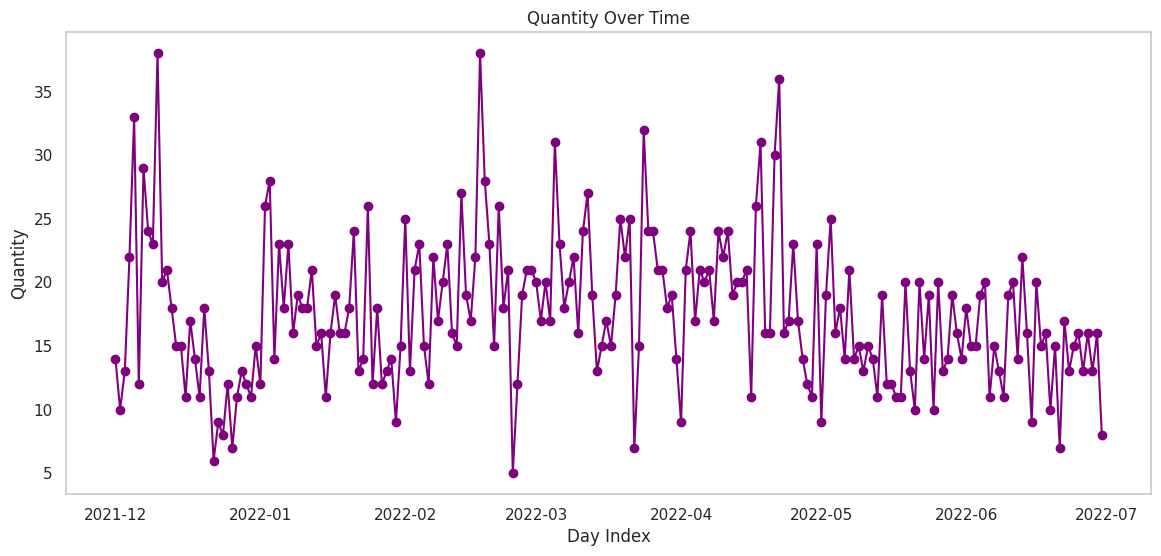

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/Data/cleaN.xlsx'
#df = pd.read_excel(file_path)

# Plot Quantity over time (Day Index)
plt.figure(figsize=(14, 6))
plt.plot(df['Day Index'], df['Quantity'], color='PURPLE', marker='o', linestyle='-')
plt.title('Quantity Over Time')
plt.xlabel('Day Index')
plt.ylabel('Quantity')
plt.grid()
plt.show()

FEATURE ENGINEERING

In [46]:
import pandas as pd

# Load the dataset
dataset = pd.read_excel('/content/drive/MyDrive/infosys/clean.xlsx')

# Convert 'Day Index' to datetime format for date-based operations
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

# Adding 'Weekend' column (1 if the day is Saturday or Sunday, otherwise 0)
dataset['Weekend'] = dataset['Day Index'].dt.weekday.isin([5, 6]).astype(int)

# Adding 'Day of Week' and 'Month Name' columns
dataset['Day of Week'] = dataset['Day Index'].dt.day_name()
dataset['Month Name'] = dataset['Day Index'].dt.month_name()

# Adding one-hot encoded columns for each day of the week and month, ensuring all values are 0 or 1
day_dummies = pd.get_dummies(dataset['Day of Week'], prefix='', prefix_sep='').astype(int)
month_dummies = pd.get_dummies(dataset['Month Name'], prefix='', prefix_sep='').astype(int)
dataset = pd.concat([dataset, day_dummies, month_dummies], axis=1)

# Save the modified dataset to a new Excel file named 'enhanced.xlsx'
dataset.to_excel('/content/drive/MyDrive/infosys/enhanced_data.xlsx', index=False)

# Load the dataset
dataset = pd.read_excel('/content/drive/MyDrive/infosys/clean.xlsx')

# Convert 'Day Index' to datetime format for date-based operations
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

#Adding Month Name column
dataset['Month Name'] = dataset['Day Index'].dt.month_name()
month_dummies = pd.get_dummies(dataset['Month Name'], prefix='', prefix_sep='').astype(int)


# 1) Adding 'Weekend' column (1 if the day is Saturday or Sunday, otherwise 0)
dataset['Weekend'] = dataset['Day Index'].dt.weekday.isin([5, 6]).astype(int)

# 2) Adding 'Day of Week' column
dataset['Day of Week'] = dataset['Day Index'].dt.day_name()

# 3-9) Adding columns for each day of the week (1 if that day, otherwise 0)
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in days_of_week:
    dataset[day] = (dataset['Day of Week'] == day).astype(int)

# 10-21) Adding columns for each month (1 if the date is in that month, otherwise 0)
months_of_year = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']
for i, month in enumerate(months_of_year, start=1):
    dataset[month] = (dataset['Day Index'].dt.month == i).astype(int)


# Save the modified dataset to a new Excel file named 'enhanced.xlsx'
dataset.to_excel('/content/drive/MyDrive/infosys/enhanced_data.xlsx', index=False)

print("Enhanced dataset saved to 'enhanced_data.xlsx'")

Enhanced dataset saved to 'enhanced_data.xlsx'


ADDING NEW COLUMNS TO DATASET

In [48]:

import pandas as pd

# Loading the data
data = pd.read_excel('/content/drive/MyDrive/infosys/enhanced_data.xlsx')

# Setting display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Displaying all rows of the dataset
data.head(len(data))

,Day Index,Quantity,Impressions,Clicks,imputed_Quantity,Month Name,Weekend,Day of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,January,February,March,April,May,June,July,August,September,October,November,December
0,2021-12-01,14,620,445,14.00,December,0,Wednesday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2021-12-02,10,890,433,10.00,December,0,Thursday,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2021-12-03,13,851,424,13.00,December,0,Friday,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2021-12-04,22,881,427,22.00,December,1,Saturday,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2021-12-05,33,678,451,30.67,December,1,Sunday,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
5,2021-12-06,12,995,429,12.00,December,0,Monday,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,2021-12-07,29,910,444,29.00,December,0,Tuesday,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,2021-12-08,24,867,431,24.00,December,0,Wednesday,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,2021-12-09,23,1128,456,23.00,December,0,Thursday,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,2021-12-10,38,1129,391,30.67,December,0,Friday,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


STATISTICS

In [50]:
import pandas as pd
from tabulate import tabulate

# Load the dataset
file_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
df = pd.read_excel(file_path)

# Get statistics
descriptive_stats = df.describe()

# Display statistics in a table format
print(tabulate(descriptive_stats, headers='keys', tablefmt='grid'))

+-------+---------------------+------------+---------------+----------+--------------------+------------+------------+------------+-------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+--------+----------+-------------+-----------+------------+------------+
|       | Day Index           |   Quantity |   Impressions |   Clicks |   imputed_Quantity |    Weekend |     Monday |    Tuesday |   Wednesday |   Thursday |     Friday |   Saturday |     Sunday |    January |   February |      March |      April |        May |       June |   July |   August |   September |   October |   November |   December |
+=======+=====================+============+===============+==========+====================+============+============+============+=============+============+============+============+============+============+============+============+============+============+============+========+==========+=========

DATA ANALYSIS


 correlation:


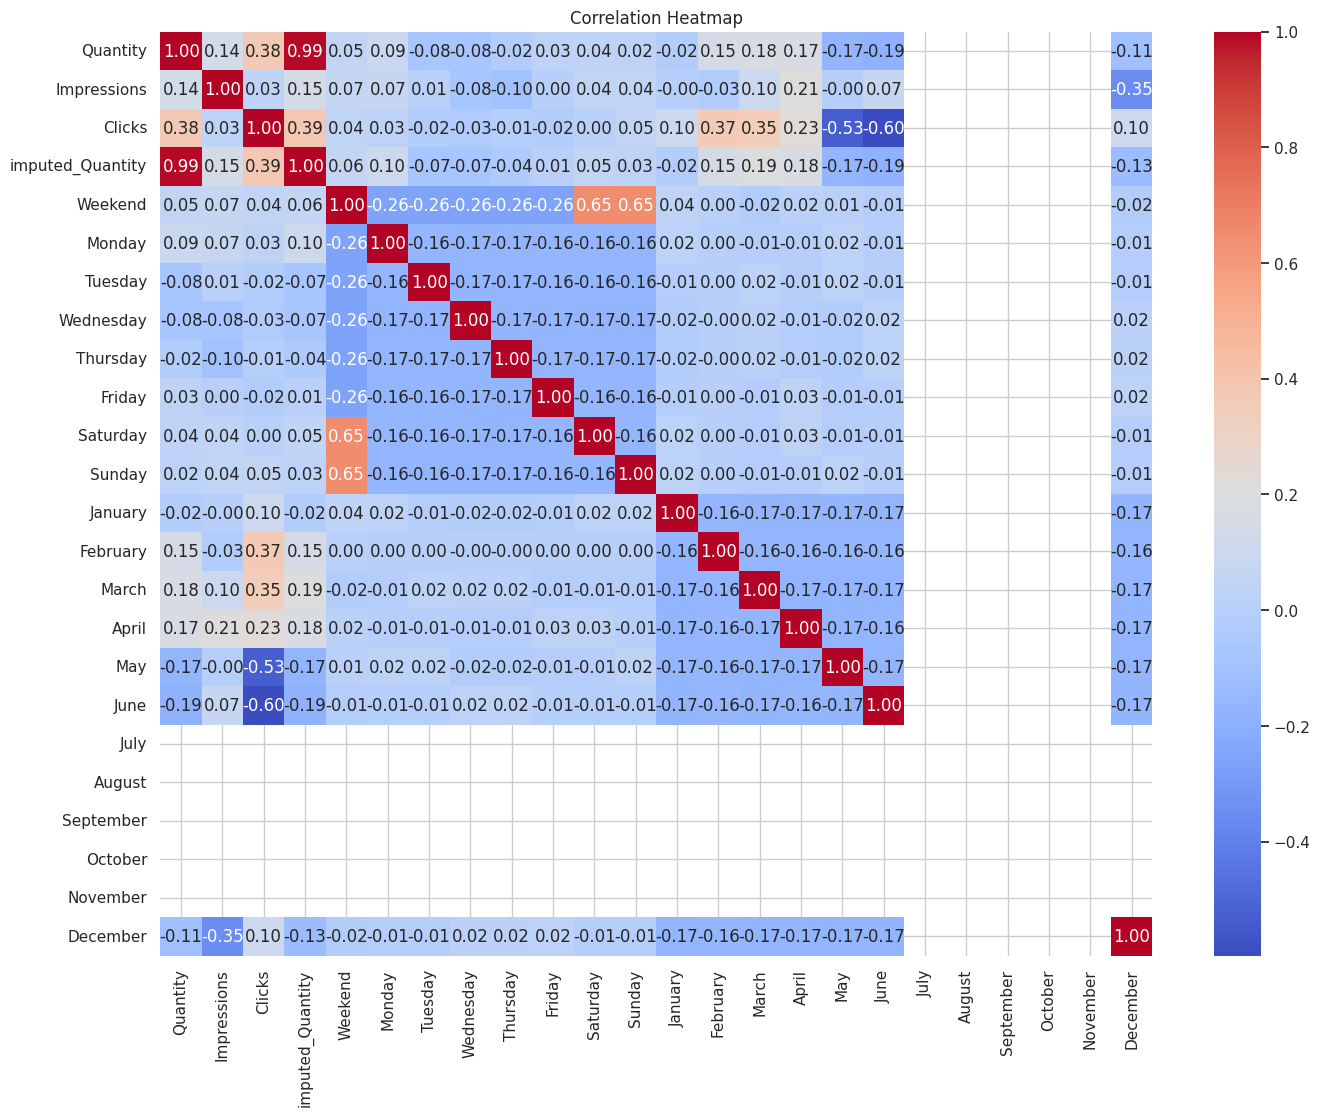

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_data = dataset.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()




PLOTTING THE LINEAR REGRESSION

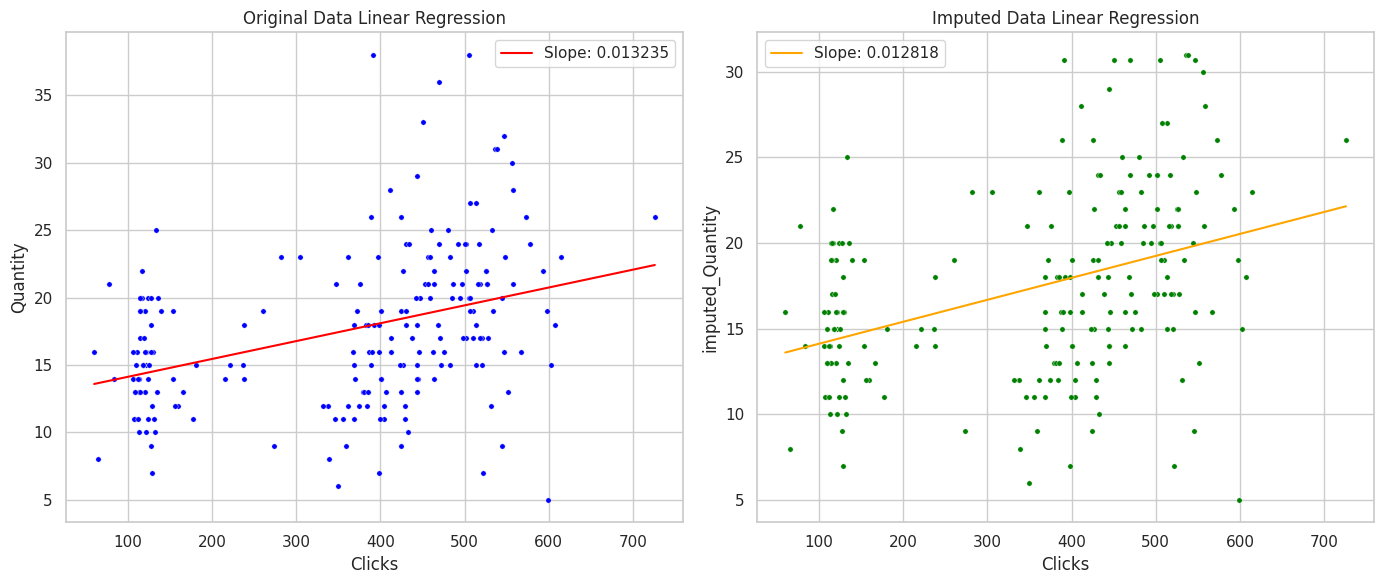

The slope for the Linear Regression of Original Quantity: 0.013234961484
The slope for the Linear Regression of Imputed Quantity: 0.012818303347


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the dataset
dataset = pd.read_excel('/content/drive/MyDrive/infosys/enhanced_data.xlsx')

# Specify the features and targets
feature = 'Clicks'
target = 'Quantity'
target2 = 'imputed_Quantity'

# Drop rows where Quantity or Clicks is missing for original analysis
data_original = dataset[[feature, target,target2]].dropna()

# Initialize and fit linear regression for the original dataset
X_original = data_original[[feature]]
y_original = data_original[target]
model_original = LinearRegression()
model_original.fit(X_original, y_original)
y_pred_original = model_original.predict(X_original)
slope_original = model_original.coef_[0]

# Impute missing values in the Quantity column
imputer = SimpleImputer(strategy='mean')
dataset[target] = imputer.fit_transform(dataset[[target]])
dataset.rename(columns={target2: 'imputed_Quantity'}, inplace=True)

# Fit linear regression for the imputed dataset
X_imputed = dataset[[feature]]
y_imputed = dataset['imputed_Quantity']
model_imputed = LinearRegression()
model_imputed.fit(X_imputed, y_imputed)
y_pred_imputed = model_imputed.predict(X_imputed)
slope_imputed = model_imputed.coef_[0]

# Plotting both regression lines
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the original data
sns.scatterplot(x=feature, y=target, data=data_original, ax=axes[0], color='blue', s=15)
sns.lineplot(x=X_original[feature], y=y_pred_original, ax=axes[0], color='red', label=f'Slope: {slope_original:.6f}')
axes[0].set_title('Original Data Linear Regression')
axes[0].set_xlabel(feature)
axes[0].set_ylabel(target)

# Plot for the imputed data
sns.scatterplot(x=feature, y=target2, data=dataset, ax=axes[1], color='green', s=15)
sns.lineplot(x=X_imputed[feature], y=y_pred_imputed, ax=axes[1], color='orange', label=f'Slope: {slope_imputed:.6f}')
axes[1].set_title('Imputed Data Linear Regression')
axes[1].set_xlabel(feature)
axes[1].set_ylabel('imputed_Quantity')

# Show the plot
plt.tight_layout()
plt.show()

# Print slopes for interpretation
print(f"The slope for the Linear Regression of Original Quantity: {slope_original:.12f}")
print(f"The slope for the Linear Regression of Imputed Quantity: {slope_imputed:.12f}")


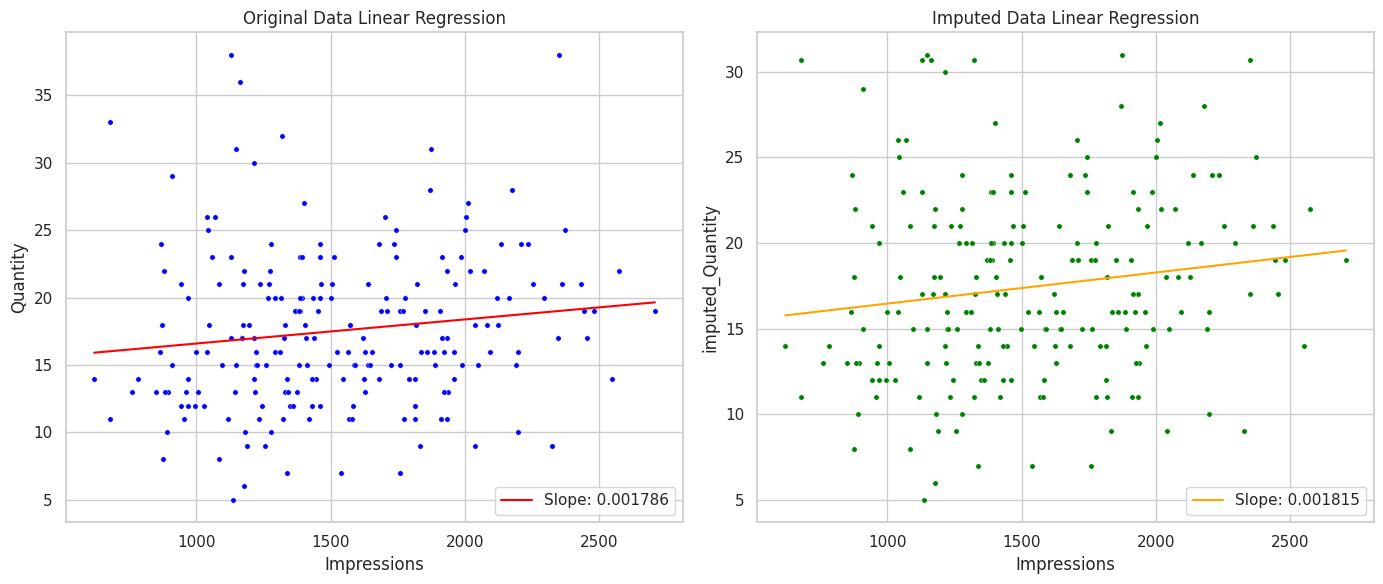

The slope for the Linear Regression of Original Quantity: 0.001786329310
The slope for the Linear Regression of Imputed Quantity: 0.001815151452


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Load the dataset
dataset = pd.read_excel('/content/drive/MyDrive/infosys/enhanced_data.xlsx')

# Specify the features and targets
feature = 'Impressions'
target = 'Quantity'
target2 = 'imputed_Quantity'

# Drop rows where Quantity or Clicks is missing for original analysis
data_original = dataset[[feature, target,target2]].dropna()

# Initialize and fit linear regression for the original dataset
X_original = data_original[[feature]]
y_original = data_original[target]
model_original = LinearRegression()
model_original.fit(X_original, y_original)
y_pred_original = model_original.predict(X_original)
slope_original = model_original.coef_[0]

# Impute missing values in the Quantity column
imputer = SimpleImputer(strategy='mean')
dataset[target] = imputer.fit_transform(dataset[[target]])
dataset.rename(columns={target2: 'imputed_Quantity'}, inplace=True)

# Fit linear regression for the imputed dataset
X_imputed = dataset[[feature]]
y_imputed = dataset['imputed_Quantity']
model_imputed = LinearRegression()
model_imputed.fit(X_imputed, y_imputed)
y_pred_imputed = model_imputed.predict(X_imputed)
slope_imputed = model_imputed.coef_[0]

# Plotting both regression lines
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the original data
sns.scatterplot(x=feature, y=target, data=data_original, ax=axes[0], color='blue', s=15)
sns.lineplot(x=X_original[feature], y=y_pred_original, ax=axes[0], color='red', label=f'Slope: {slope_original:.6f}')
axes[0].set_title('Original Data Linear Regression')
axes[0].set_xlabel(feature)
axes[0].set_ylabel(target)

# Plot for the imputed data
sns.scatterplot(x=feature, y=target2, data=dataset, ax=axes[1], color='green', s=15)
sns.lineplot(x=X_imputed[feature], y=y_pred_imputed, ax=axes[1], color='orange', label=f'Slope: {slope_imputed:.6f}')
axes[1].set_title('Imputed Data Linear Regression')
axes[1].set_xlabel(feature)
axes[1].set_ylabel('imputed_Quantity')

# Show the plot
plt.tight_layout()
plt.show()

# Print slopes for interpretation
print(f"The slope for the Linear Regression of Original Quantity: {slope_original:.12f}")
print(f"The slope for the Linear Regression of Imputed Quantity: {slope_imputed:.12f}")

DAY WISE ANALYSIS THROUGH TIME

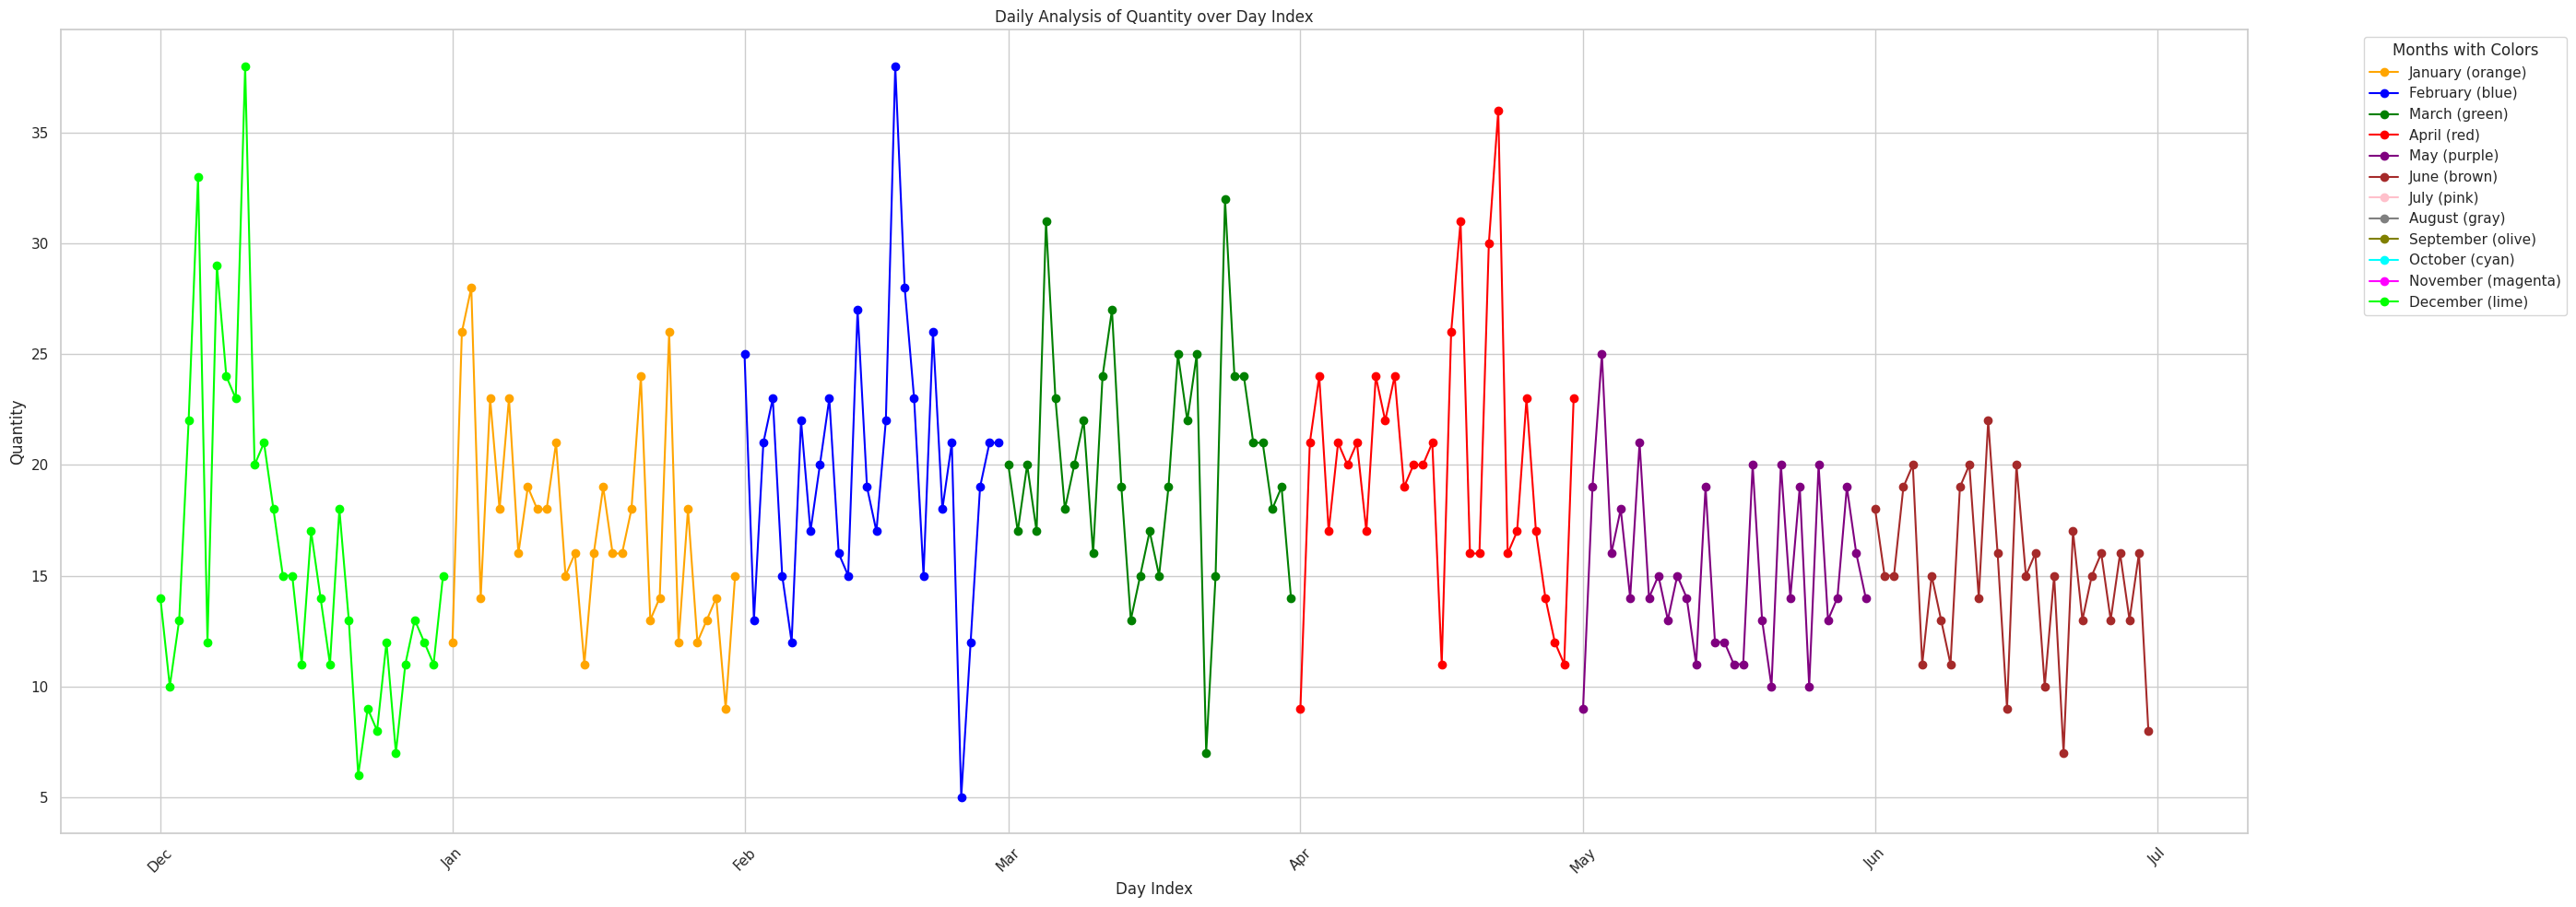

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Load your dataset
dataset = pd.read_excel('/content/drive/MyDrive/infosys/enhanced_data.xlsx')

# Ensure 'Day Index' is in datetime format if it isn't already
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

# Adding a Month column for easy grouping
dataset['Month'] = dataset['Day Index'].dt.month


# Set up the colors for each month
colors = [
    "orange", "blue", "green", "red", "purple", "brown",
    "pink", "gray", "olive", "cyan", "magenta", "lime"
]
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]


# Plotting with markers for each month
plt.figure(figsize=(28, 10))
for month, color in zip(range(1, 13), colors):
    month_data = dataset[dataset['Month'] == month]
    plt.plot(month_data['Day Index'], month_data['Quantity'], marker='o', linestyle='-',
             label=f"{months[month-1]} ({color})", color=color)


# Display the plot with updated settings
plt.title("Daily Analysis of Quantity over Day Index")
plt.xlabel("Day Index")
plt.ylabel("Quantity")

# Configure date formatting for x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)
plt.legend(title="Months with Colors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


DAILY TRENDS FOR CLICKS THROUGH TIME

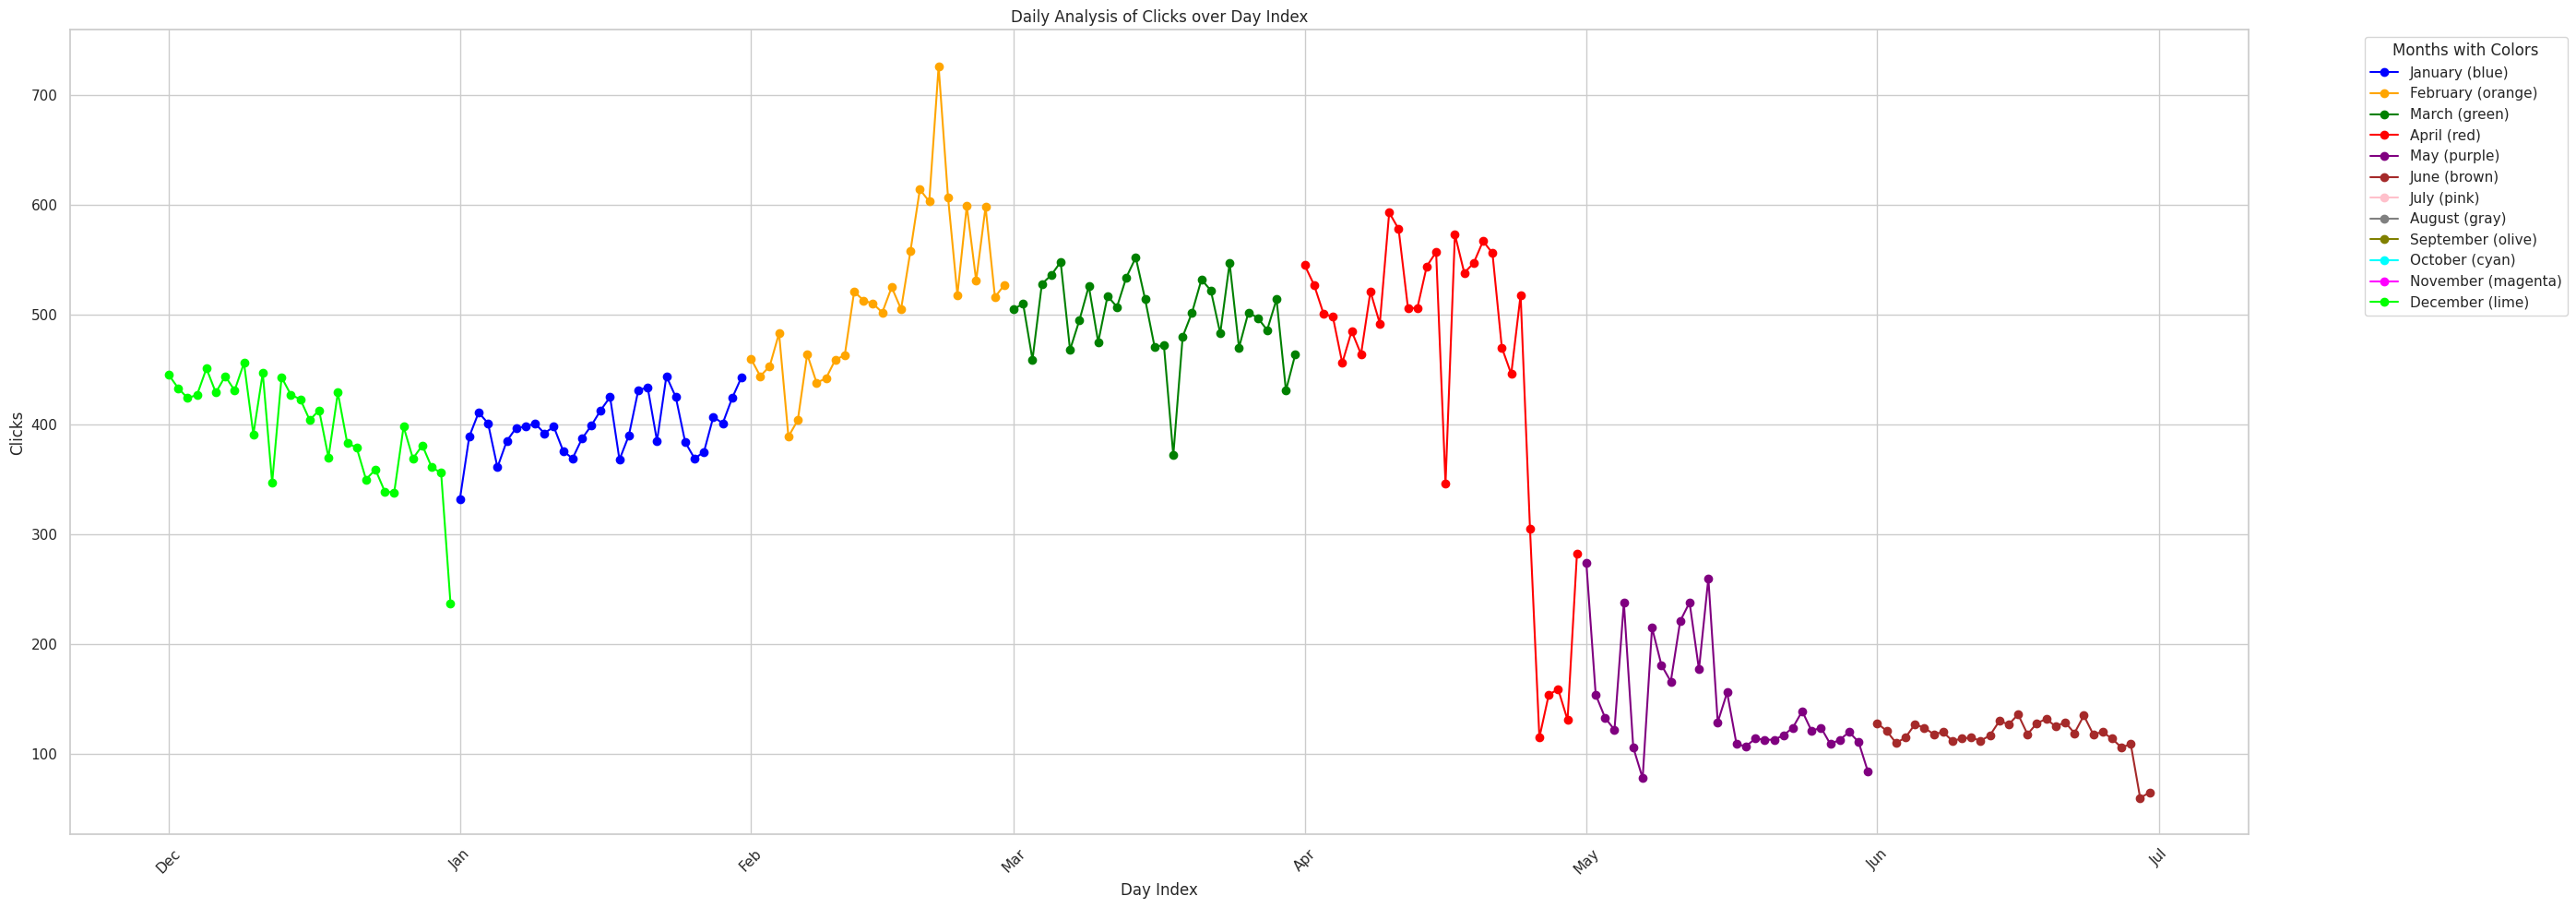

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Load your dataset
dataset = pd.read_excel('/content/drive/MyDrive/infosys/enhanced_data.xlsx')

# Ensure 'Day Index' is in datetime format if it isn't already
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

# Adding a Month column for easy grouping
dataset['Month'] = dataset['Day Index'].dt.month

# Set up the colors for each month
colors = [
    "blue", "orange", "green", "red", "purple", "brown",
    "pink", "gray", "olive", "cyan", "magenta", "lime"
]
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Plotting with markers for each month
plt.figure(figsize=(28, 10))
for month, color in zip(range(1, 13), colors):
    month_data = dataset[dataset['Month'] == month]
    plt.plot(month_data['Day Index'], month_data['Clicks'], marker='o', linestyle='-',
         label=f"{months[month-1]} ({color})", color=color)


# Display the plot with updated settings
plt.title("Daily Analysis of Clicks over Day Index")
plt.xlabel("Day Index")
plt.ylabel("Clicks")

# Configure date formatting for x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)
plt.legend(title="Months with Colors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

DAY WISE TRENDS FOR IMPRESSION THROUGH TIME

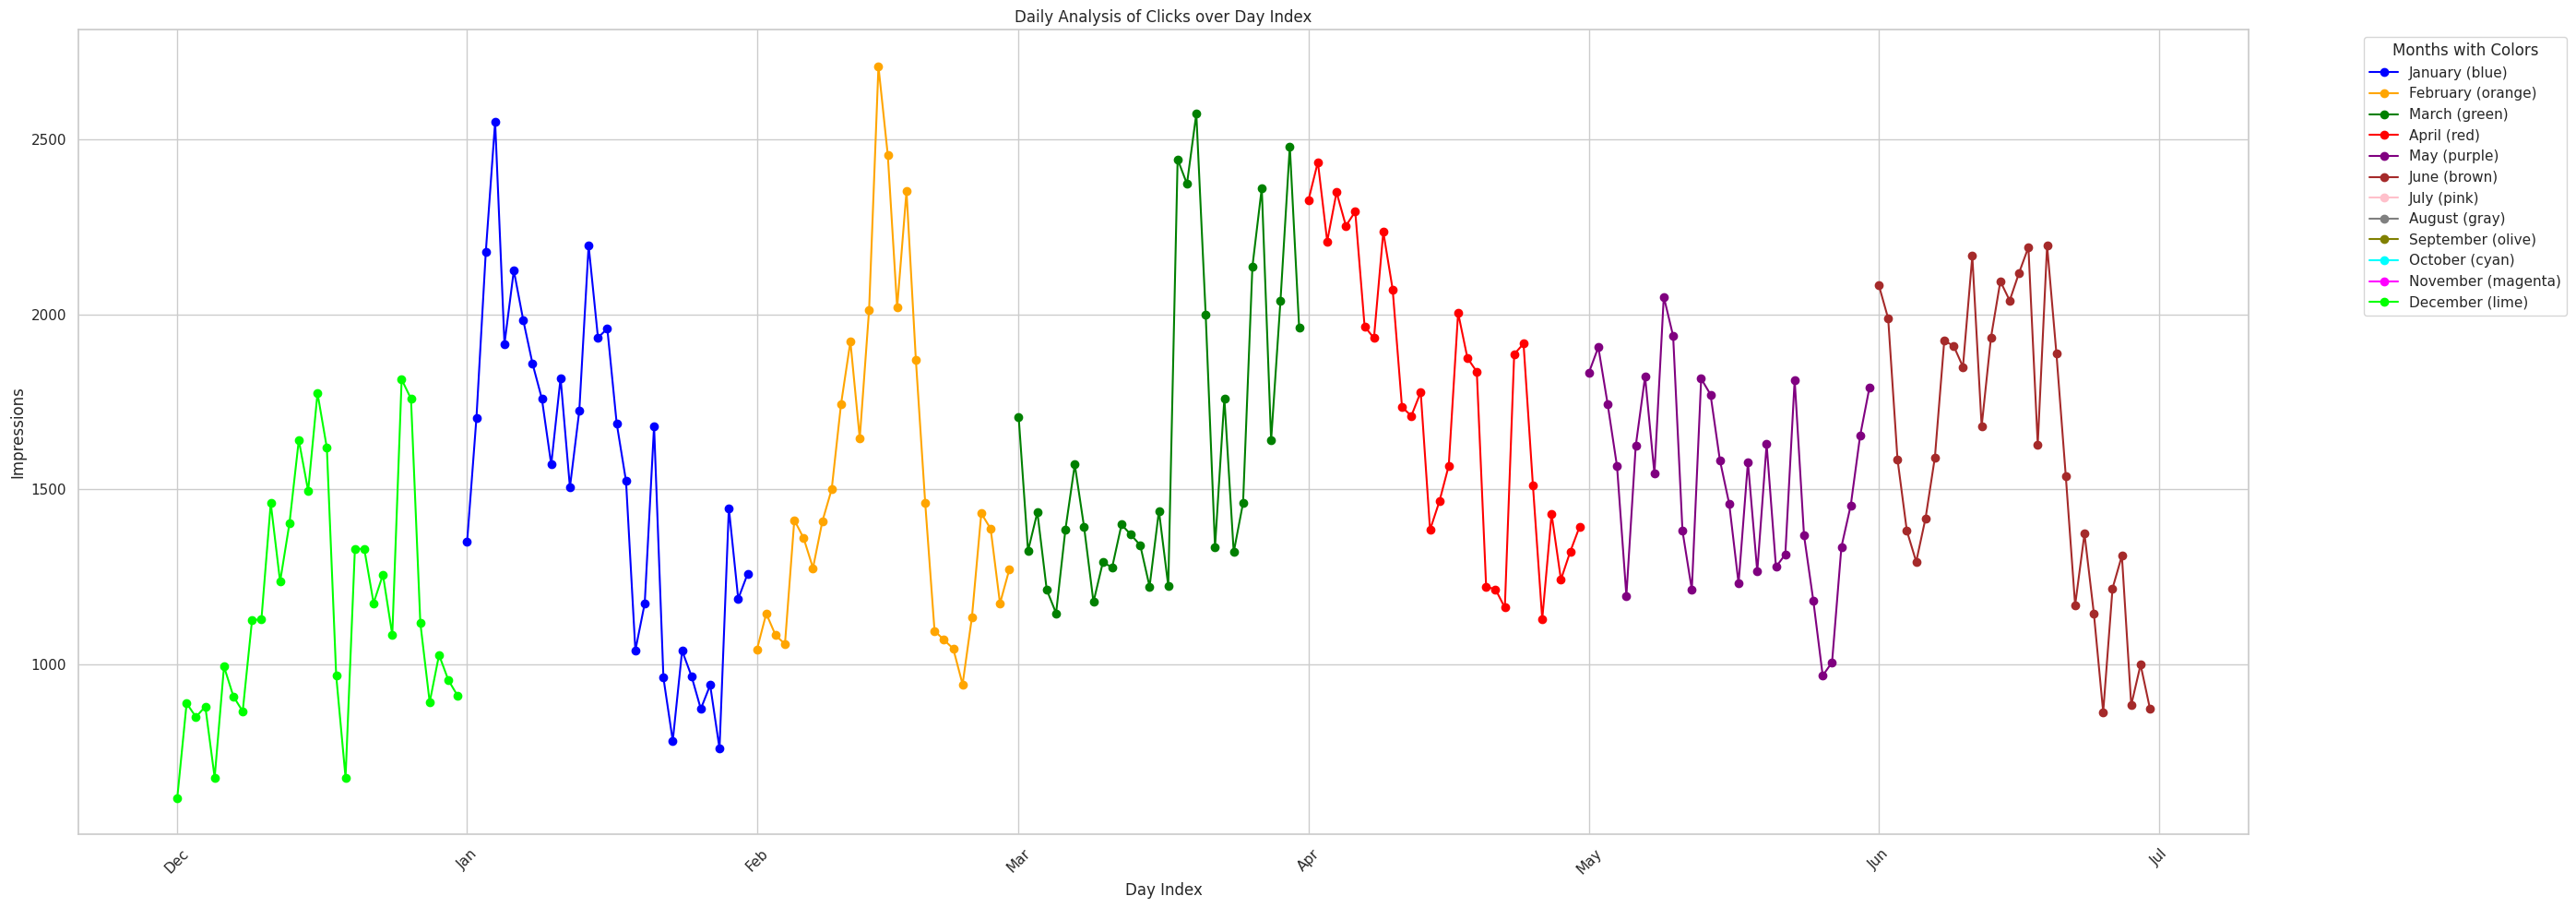

In [65]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

# Load your dataset
dataset = pd.read_excel('/content/drive/MyDrive/infosys/enhanced_data.xlsx')

# Ensure 'Day Index' is in datetime format if it isn't already
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])

# Adding a Month column for easy grouping
dataset['Month'] = dataset['Day Index'].dt.month

# Set up the colors for each month
colors = [
    "blue", "orange", "green", "red", "purple", "brown",
    "pink", "gray", "olive", "cyan", "magenta", "lime"
]
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

# Plotting with markers for each month
plt.figure(figsize=(28, 10))
for month, color in zip(range(1, 13), colors):
    month_data = dataset[dataset['Month'] == month]
    plt.plot(month_data['Day Index'], month_data['Impressions'], marker='o', linestyle='-',
         label=f"{months[month-1]} ({color})", color=color)


# Display the plot with updated settings
plt.title("Daily Analysis of Clicks over Day Index")
plt.xlabel("Day Index")
plt.ylabel("Impressions")

# Configure date formatting for x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b"))
plt.xticks(rotation=45)
plt.legend(title="Months with Colors", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

WEEKLY DEMANDS AND TRENDS

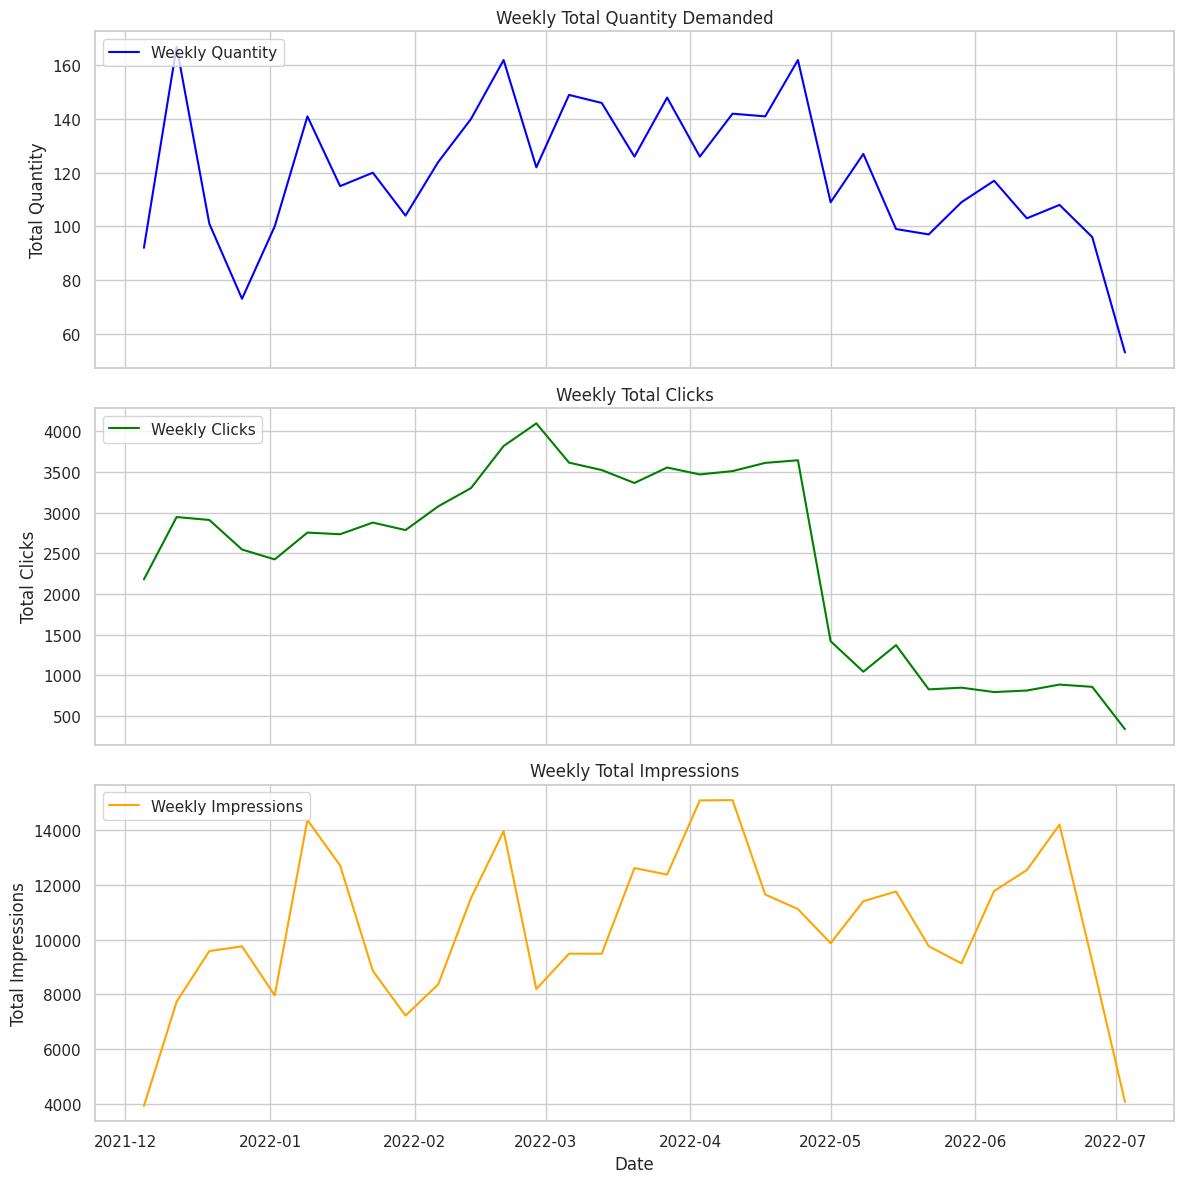

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Day Index' to datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Set 'Day Index' as the index for easier resampling by week
data.set_index('Day Index', inplace=True)

# Resample to weekly data, summing up the values for Quantity, Clicks, and Impressions
weekly_data = data.resample('W').sum()[['Quantity', 'Clicks', 'Impressions']]

# Plotting the weekly data with subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Quantity plot
axs[0].plot(weekly_data.index, weekly_data['Quantity'], label='Weekly Quantity', color='blue')
axs[0].set_ylabel('Total Quantity')
axs[0].legend(loc='upper left')
axs[0].set_title('Weekly Total Quantity Demanded')

# Clicks plot
axs[1].plot(weekly_data.index, weekly_data['Clicks'], label='Weekly Clicks', color='green')
axs[1].set_ylabel('Total Clicks')
axs[1].legend(loc='upper left')
axs[1].set_title('Weekly Total Clicks')

# Impressions plot
axs[2].plot(weekly_data.index, weekly_data['Impressions'], label='Weekly Impressions', color='orange')
axs[2].set_ylabel('Total Impressions')
axs[2].legend(loc='upper left')
axs[2].set_title('Weekly Total Impressions')

# Label the x-axis
axs[2].set_xlabel('Date')

# Improve layout and show plot
plt.tight_layout()
plt.show()


MONTHLY DEMANDS AND TRENDS

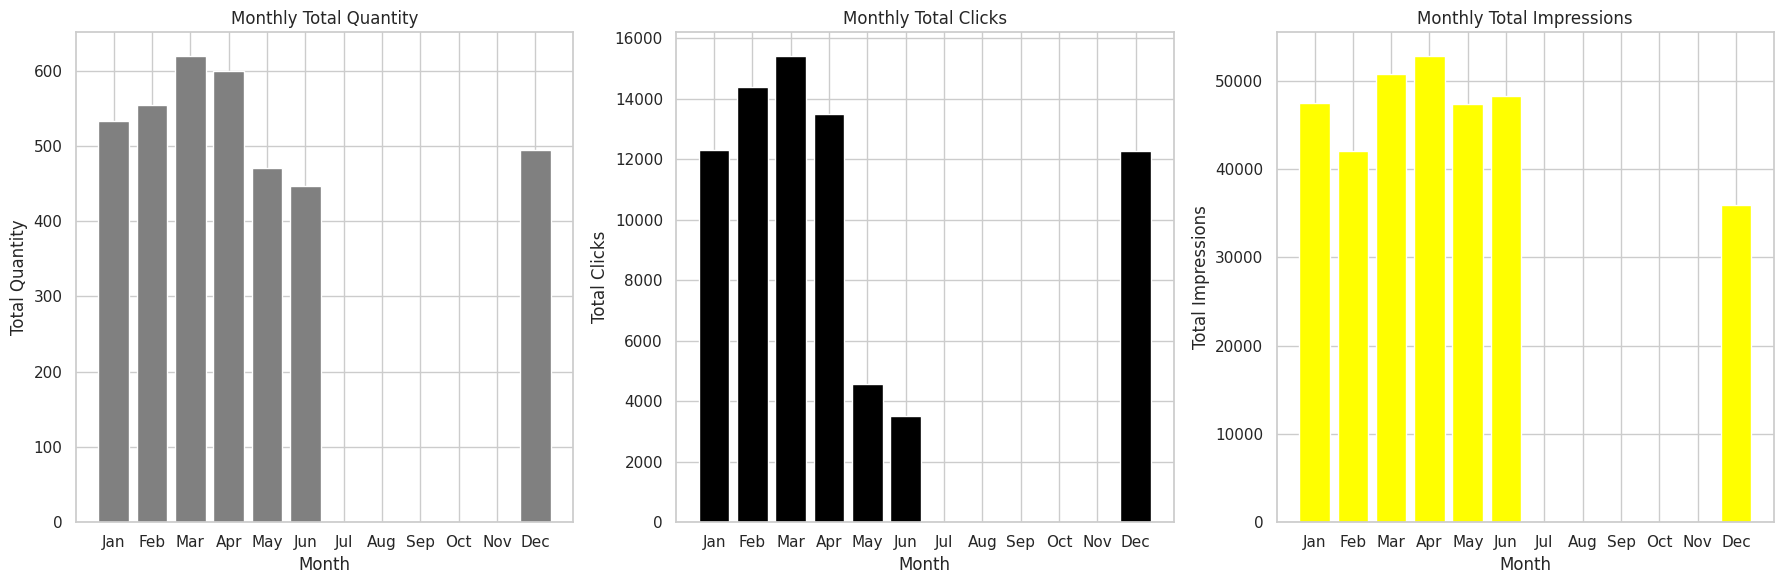

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#My Dataset
dataset = pd.read_excel('/content/drive/MyDrive/infosys/enhanced_data.xlsx')

# Ensure 'Day Index' is in datetime format and add a Month column
dataset['Day Index'] = pd.to_datetime(dataset['Day Index'])
dataset['Month'] = dataset['Day Index'].dt.month

# Calculate monthly totals for Quantity, Clicks, and Impressions
# Exclude 'Day Index' from the summation as it's a datetime column
monthly_totals = dataset.groupby('Month')[['Quantity', 'Clicks', 'Impressions']].sum()

# Set up subplots for monthly total plots of Quantity, Clicks, and Impressions
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Plot Monthly Total Quantity
axes[0].bar(monthly_totals.index, monthly_totals['Quantity'], color='grey')
axes[0].set_title('Monthly Total Quantity')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Total Quantity')
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels([
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

# Plot Monthly Total Clicks
axes[1].bar(monthly_totals.index, monthly_totals['Clicks'], color='black')
axes[1].set_title('Monthly Total Clicks')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Clicks')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels([
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

# Plot Monthly Total Impressions
axes[2].bar(monthly_totals.index, monthly_totals['Impressions'], color='yellow')
axes[2].set_title('Monthly Total Impressions')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Total Impressions')
axes[2].set_xticks(range(1, 13))
axes[2].set_xticklabels([
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

plt.tight_layout()
plt.show()

MONTHLY TRENDS OF ORIGINAL AND IMPUTED DATA ANALYSIS

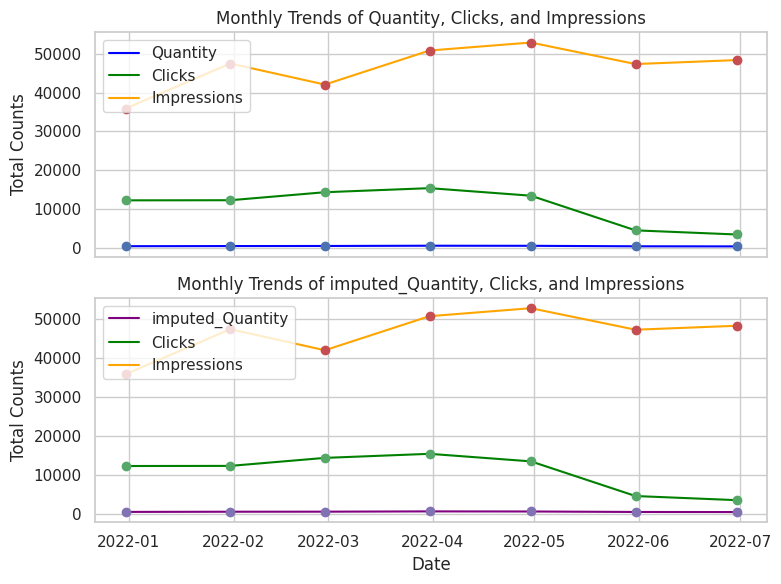

In [63]:

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load the data
file_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Day Index' to datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Set 'Day Index' as the index for easier resampling by month
data.set_index('Day Index', inplace=True)

# Resample to monthly data, summing up the values for the relevant columns
monthly_data = data.resample('M').sum()[['Quantity', 'Clicks', 'Impressions', 'imputed_Quantity']]

# Plotting monthly trends with subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# First subplot: Quantity, Clicks, and Impressions
axs[0].plot(monthly_data.index, monthly_data['Quantity'], label='Quantity', color='blue')
axs[0].plot(monthly_data.index, monthly_data['Clicks'], label='Clicks', color='green')
axs[0].plot(monthly_data.index, monthly_data['Impressions'], label='Impressions', color='orange')
axs[0].set_ylabel('Total Counts')
axs[0].legend(loc='upper left')
axs[0].set_title('Monthly Trends of Quantity, Clicks, and Impressions')

# Marking the peaks for Quantity, Clicks, and Impressions
# For the first subplot (Quantity, Clicks, Impressions)
for month in monthly_data.index:
    # Find the max value for Quantity, Clicks, and Impressions within each month
    max_quantity = monthly_data.loc[month, 'Quantity']
    max_clicks = monthly_data.loc[month, 'Clicks']
    max_impressions = monthly_data.loc[month, 'Impressions']

    # Plot each monthly peak
    axs[0].plot(month, max_quantity, 'bo')
    axs[0].plot(month, max_clicks, 'go')
    axs[0].plot(month, max_impressions, 'ro')

# Second subplot: imputed_Quantity, Clicks, and Impressions
axs[1].plot(monthly_data.index, monthly_data['imputed_Quantity'], label='imputed_Quantity', color='purple')
axs[1].plot(monthly_data.index, monthly_data['Clicks'], label='Clicks', color='green')
axs[1].plot(monthly_data.index, monthly_data['Impressions'], label='Impressions', color='orange')
axs[1].set_ylabel('Total Counts')
axs[1].legend(loc='upper left')
axs[1].set_title('Monthly Trends of imputed_Quantity, Clicks, and Impressions')

# For the second subplot (imputed_Quantity, Clicks, Impressions)
for month in monthly_data.index:
    # Find the max value for imputed_Quantity, Clicks, and Impressions within each month
    max_imputed_quantity = monthly_data.loc[month, 'imputed_Quantity']
    max_clicks_2 = monthly_data.loc[month, 'Clicks']
    max_impressions_2 = monthly_data.loc[month, 'Impressions']

    # Plot each monthly peak
    axs[1].plot(month, max_imputed_quantity, 'mo')
    axs[1].plot(month, max_clicks_2, 'go')
    axs[1].plot(month, max_impressions_2, 'ro')
# Label the x-axis
axs[1].set_xlabel('Date')

# Improve layout and show plot
plt.tight_layout()
plt.show()


Percentage Distribution of Daily Clicks and Impressions by Day of the Week

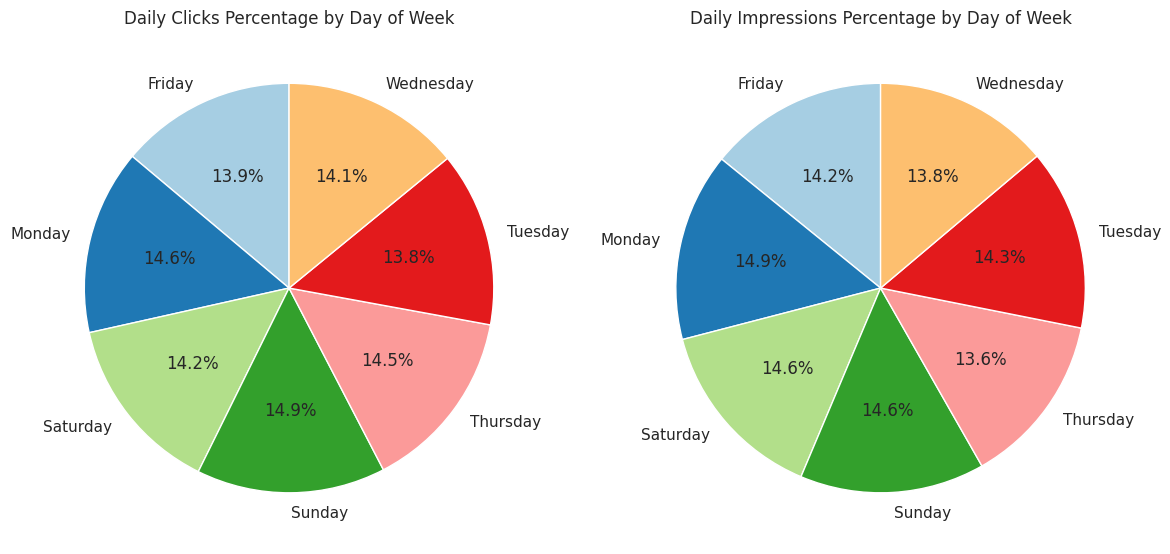

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/infosys/enhanced_data.xlsx'
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Day Index' to datetime format
data['Day Index'] = pd.to_datetime(data['Day Index'])

# Extract 'Day of Week' for grouping
data['Day of Week'] = data['Day Index'].dt.day_name()

# Group by 'Day of Week' and sum Clicks and Impressions
daily_data = data.groupby('Day of Week')[['Clicks', 'Impressions']].sum()

# Calculate percentage for Clicks and Impressions
daily_data_percent = daily_data / daily_data.sum() * 100

# Plotting the pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Clicks percentage by Day of Week
axs[0].pie(daily_data_percent['Clicks'], labels=daily_data_percent.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[0].set_title('Daily Clicks Percentage by Day of Week')

# Impressions percentage by Day of Week
axs[1].pie(daily_data_percent['Impressions'], labels=daily_data_percent.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
axs[1].set_title('Daily Impressions Percentage by Day of Week')

# Show the plots
plt.tight_layout()
plt.show()